In [1]:
!pip install folium

In [2]:
!pip install pandas

In [3]:
import folium
import pandas

In [4]:
import requests
from bs4 import BeautifulSoup

In [5]:
url="http://www.koeri.boun.edu.tr/scripts/lst9.asp"

sonuc=requests.get(url)
sonuc2=BeautifulSoup(sonuc.content,"lxml")
liste=[]
sonuc2=sonuc2.text
sonuc2=sonuc2.strip()
sonuc2=sonuc2.split("\r")
liste_enlem=[]
liste_boylam=[]
liste_yer=[]
lıste_tarıh=[]
lıste_buyukluk=[]
lıste_derınlık=[]
sehırler=[]

In [6]:
k=0
for i in range(15,len(sonuc2)-20):
     i=sonuc2[i].split()
     liste_enlem.append(i[2])
     liste_boylam.append(i[3])  
     lıste_tarıh.append(i[0]+" "+i[1])
     lıste_buyukluk.append(i[6])
     lıste_derınlık.append(i[4])
     liste_yer.append(str(i[8])+" "+str(i[9]))   
     a=liste_yer[k].split(" ")[1]
     sehırler.append(a)
     k=k+1

In [7]:
import pandas as pd
df=pd.DataFrame({"Tarih":lıste_tarıh,"Enlem":liste_enlem,"Boylam":liste_boylam,"Derinlik":lıste_derınlık,"Büyüklük":lıste_buyukluk,"Yer":liste_yer,"Sehır":sehırler})
sıralama=df.groupby("Sehır").agg({"Büyüklük": "max"})
sıralama.sort_values("Büyüklük",ascending=False)

,Büyüklük
Sehır,
(KAHRAMANMARAS),4.2
(VAN),3.8
(MALATYA),3.7
SINIR,3.6
(SIVAS),3.6
(GAZIANTEP),3.5
İlksel,3.3
(OSMANIYE),3.3
(HATAY),3.2


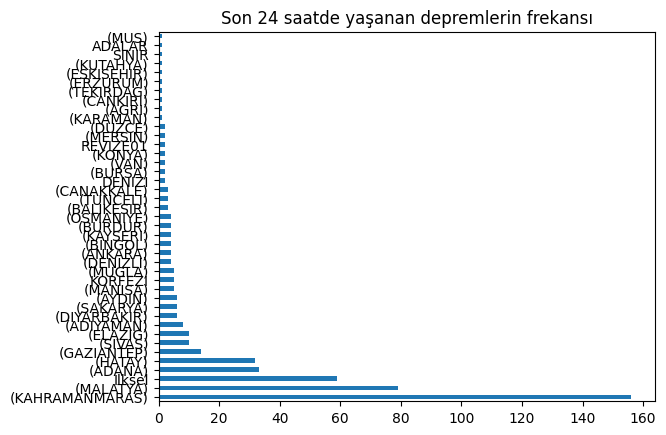

In [8]:
df["Sehır"].value_counts().plot.barh(x="Deprem Sayısı",y="Şehir").set_title("Son 24 saatde yaşanan depremlerin frekansı");

In [9]:
df.drop('Sehır',axis=1, inplace=True)
df.sort_values("Büyüklük",ascending=False)

,Tarih,Enlem,Boylam,Derinlik,Büyüklük,Yer
427,2023.04.17 01:55:55,38.0383,36.7367,4.4,4.2,YESILKOY-GOKSUN (KAHRAMANMARAS)
388,2023.04.17 07:07:17,39.1388,43.9172,4.7,3.8,CALDIRAN (VAN)
369,2023.04.17 09:28:25,38.4638,38.0288,5.0,3.7,YUKARIORUKCU-AKCADAG (MALATYA)
104,2023.04.19 01:47:36,38.0485,36.4725,5.0,3.7,CAGLAYAN-GOKSUN (KAHRAMANMARAS)
179,2023.04.18 14:40:11,38.8305,37.4352,5.0,3.6,KULAHLI-GURUN (SIVAS)
...,...,...,...,...,...,...
361,2023.04.17 10:26:18,37.8473,36.4022,27.3,1.1,KUCUKCAMURLU-GOKSUN (KAHRAMANMARAS)
262,2023.04.18 01:12:18,38.2507,36.8025,8.1,1.1,ORENDERESI-AFSIN (KAHRAMANMARAS)
246,2023.04.18 02:34:08,37.8240,37.3628,12.3,1.1,KUCUKCERIT-CAGLAYANCERIT (KAHRAMANMARAS)
454,2023.04.16 21:39:24,38.5390,37.1983,13.4,1.1,YAPILI-ELBISTAN (KAHRAMANMARAS)


In [10]:
df.head()

,Tarih,Enlem,Boylam,Derinlik,Büyüklük,Yer
0,2023.04.19 16:37:44,38.1752,38.6177,5.0,2.4,ARITOPRAK-PUTURGE (MALATYA)
1,2023.04.19 16:27:25,37.5465,37.2422,10.3,2.3,CAMLICA-PAZARCIK (KAHRAMANMARAS)
2,2023.04.19 16:24:15,38.3473,32.2325,5.5,2.4,HACIMEHMETLI-KADINHANI (KONYA)
3,2023.04.19 16:23:47,35.7325,32.5370,10.4,1.9,AKDENIZ İlksel
4,2023.04.19 16:20:34,37.8490,37.7968,5.4,2.1,YAYLACIK-GOLBASI (ADIYAMAN)


In [11]:
df["Enlem"]=df["Enlem"].astype("float64")
df["Boylam"]=df["Boylam"].astype("float64")

In [12]:
m = folium.Map(location=[39.1062,39.5483],zoom_start=6,width="%100",height="%100")
title_html = '''
             <h3 align="center" style="font-size:16px"><b>Türkiye Deprem Haritası</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))
legend_html = '''
     <div style="position: fixed; 
                 .alticizili {text-decoration: underline;}
                 bottom: 50px; left: 50px; width: 290px; height: 180px; 
                 border:2px solid grey; z-index:9999; font-size:14px;
                 background-color:white;
                 ">&nbsp; <u>Simge Bilgisi</u> <br>
                    &nbsp Son Yaşanan Deprem &nbsp; <i class="fa fa-map-marker fa-2x"
                     style="color:black"></i><br>
                   &nbsp; Deprem Büyüklüğü &gt; 5 &nbsp; <i class="fa fa-map-marker fa-2x"
                     style="color:red"></i><br>
                   &nbsp;  3 &gt; Deprem Büyüklüğü &gt; 5 &nbsp &nbsp; <i class="fa fa-map-marker fa-2x"
                     style=" color:blue"></i><br>
                   &nbsp; Deprem Büyüklüğü &lt; 3 &nbsp; <i class="fa fa-map-marker fa-2x"
                     style="color:green"></i>
      </div>
     '''
m.get_root().html.add_child(folium.Element(legend_html))

for i in range(0,len(df)):
            iframe = folium.IFrame("<h1><strong>{}</strong></h1><p><br/>"
                                           "Tarih : {}<br/>"
                                           "Şehir :{} <br/>"
                                           "Büyüklük :{} <br/>"
                                           "Derinlik :{} <br/>"
                                           "</p>".format("Deprem", lıste_tarıh[i],liste_yer[i],lıste_buyukluk[i],
                                                         lıste_derınlık[i]))
            popup = folium.Popup(iframe,
                                         min_width=290,
                                         max_width=290)
            x = float(df["Büyüklük"][i])
            if(i==0):
                folium.Marker(location=[df['Enlem'][i], df['Boylam'][i]], popup=popup, icon=folium.Icon(color="black", icon='info-sign'),
                                        tooltip=liste_yer[i]).add_to(m)
            else:    
                if (x>5):
                    folium.Marker(location=[df['Enlem'][i], df['Boylam'][i]], popup=popup, icon=folium.Icon(color="red", icon='info-sign'),
                                            tooltip=liste_yer[i]).add_to(m)
                elif(5>x>3):
                    folium.Marker(location=[df['Enlem'][i], df['Boylam'][i]], popup=popup, icon=folium.Icon(color="blue", icon='info-sign'),
                                            tooltip=liste_yer[i]).add_to(m)
                else:
                    folium.Marker(location=[df['Enlem'][i], df['Boylam'][i]], popup=popup, icon=folium.Icon(color="green", icon='info-sign'),
                                            tooltip=liste_yer[i]).add_to(m)
m


In [13]:
m.save("deprem.html")

In [14]:
from folium import plugins
m = folium.Map([39.1062,39.5483], zoom_start=6,width="%100",height="%100")
location=df[["Enlem","Boylam"]]

plugins.MarkerCluster(location).add_to(m)

m

In [15]:
m=folium.Map(location=[39.1062,39.5483],tiles="OpenStreetMap",zoom_start=6)
heat_df=df[["Enlem","Boylam"]]
heat_data=list(zip(df.Enlem, df.Boylam))
folium.plugins.HeatMap(heat_data).add_to(m)
m